In [1]:
import XRDXRFutils.data as xdata
synt = xdata.DataSXRF()

In [2]:
#read from xmso's data directory named "outdata"
datadir = '/home/rosario/xmimsim/synthetic/FeMnCaHg/outdata'
#synt.read(datadir) # very slow
#before calling the read() method, the number of bins, if different from 2048, can be setted
synt.set_nbins(1024) #atcually only a number of 1024 bin is implemented
synt.read(datadir)
print(len(synt))

Reading SXRF data from /home/rosario/xmimsim/synthetic/FeMnCaHg/outdata
Error while parsing
/home/rosario/xmimsim/synthetic/FeMnCaHg/outdata/sxrf.h5
12375


In [3]:
print(type(synt.spe_objs)) #is a list of SpectraSXRF objects (see XRDXRFutils/spectra.py)
print(type(synt.spe_objs[0]))
symbols = ["Pb", "Fe", "Mn", "Ca", "Hg"]
lines = ["L", "K", "K", "K", "L"]
synt = synt.get_data_and_labels(symbols, lines) #get the data (inputs) and labels (targets) and store symbols and
# lines as metadata
# now synt.data synt.energy and synt.labels attributes exist
print(synt.data.shape)
print(synt.energy.shape)
print(synt.labels.shape)

AttributeError: 'DataSXRF' object has no attribute 'spe_objs'

In [6]:
#save hdf5 file
import glob
import os
synt.save_h5() # default name = class name
print(glob.glob(os.path.join(datadir, "*.h5")))

Saving: /home/rosario/xmimsim/synthetic/FeMnCaHg/outdata/sxrf.h5
[]


In [8]:
sim_par = synt.get_sim_parameters() # get simulation parameters (used for hdf5 file)
print(sim_par.reflayer_elements.shape)
print(sim_par.reflayer_thickness.shape)
print(sim_par.sublayer_thickness.shape)
print(sim_par.weight_fractions.shape)

(12375, 4)
(12375,)
(12375,)
(12375, 4)


In [7]:
#another method
import os
symbols = ["Pb", "Fe", "Mn", "Ca", "Hg"]
lines = ["L", "K", "K", "K", "L"]
datadir = '/home/rosario/xmimsim/synthetic/FeMnCaHg/outdata/Fe-Mn-Ca-Hg'
xmso_fnames = [os.path.join(datadir, f) for f in os.listdir(datadir)] # or another way to collect xmso files
synt.spe_objs = [s for s in synt.__read__(xmso_fnames)]
synt = synt.get_data_and_labels(symbols, lines) #as above
print(synt.data.shape)
print(synt.energy.shape)
print(synt.labels.shape)

KeyboardInterrupt: 

In [4]:
#save hdf5 file
synt.save_h5('/home/rosario/test_h5.h5')

Saving: /home/rosario/test_h5.h5


In [10]:
#read from hdf5
synt = xdata.DataSXRF()
h5fname = '/home/rosario/test_h5.h5'
synt.load_h5(h5fname)
print(synt.data.shape)
print(synt.energy.shape)
print(synt.labels.shape)
print(synt.reflayer_elements.shape)
print(synt.reflayer_thickness.shape)
print(synt.sublayer_thickness.shape)
print(synt.weight_fractions.shape)
for k, v in synt.metadata.items():
    print(k,v)

Loading: /home/rosario/test_h5.h5
(100, 2048)
(2048,)
(100, 5)
(100, 4)
(100,)
(100,)
(100, 4)
lines ['L' 'K' 'K' 'K' 'L']
symbols ['Pb' 'Fe' 'Mn' 'Ca' 'Hg']


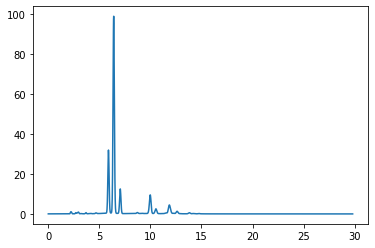

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(synt.energy, synt.data[42,:])
plt.show()

In [ ]:
#load_h5 method
def load_h5(self,filename):

    print('Loading:',filename)
    with h5py.File(filename,'r') as f:
                
        self.parameters = SimParameters() # SimParameters is a datastruct in data.py
        self.data = f['inputs'][:]
        self.labels = f['targets'][:]
        self.reflayer_thickness = f['reflayer_thickness'][:]
        self.sublayer_thickness = f['sublayer_thickness'][:]
        self.reflayer_elements = f['reflayer_elements'][:]
        self.weight_fractions = f['weight_fractions'][:]
        self.energy = f['energy'][:]

        for k,v in f.attrs.items():
            self.metadata[k] = v

In [13]:
def rebin(x,y):
        xx = x[::2]
        yp = y[:-1] + y[1:]
        yy = yp[::2]
        return xx, yy

In [14]:
new_e, new_c= rebin(synt.energy,synt.data[42,:])

In [17]:
%matplotlib tk
fig, ax = plt.subplots()
ax.plot(synt.energy,synt.data[42,:])
ax.plot(new_e,new_c, label = "rebinned 1024")
ax.legend()
plt.show()